In [31]:
import numpy as np
from matplotlib import pyplot as plt

In [32]:
def ODE_RK4 (f, t0, tf, y0, n = 100) :

    t = np.linspace(t0, tf, n)
    y = list([y0])

    for i in range(n-1) :
        h = t[i+1] - t[i]
        k1 = h*f(t[i], y[-1])
        k2 = h*f(t[i]+(h/2.0), y[-1]+(k1/2.0))
        k3 = h*f(t[i]+(h/2.0), y[-1]+(k2/2.0))
        k4 = h*f(t[i]+h, y[-1]+k3)
        y.append(y[-1]+(k1+2*k2+2*k3+k4)/6)

    y = np.array(y)

    return y

In [33]:
def shooting (F, t0, tf, y0, yf, n = 100, tol = 10**(-8), kmax = 100) :
    #t : independent variables
    #y : dependent variables
    #n : step
    #kmax : max shooting steps

    yp0 = float(yf - y0)/(tf - t0) #initial guess of y'(0)
    Y0 = np.array([y0, yp0])
    Y = ODE_RK4(F, t0, tf, Y0, n)
    err = Y[-1][0] - yf #first miscatching
    Y0[1] = yp0 - 0.1*np.sign(err) 

    for k in range(kmax - 1) :
        Y = ODE_RK4(F, t0, tf, Y0, n)
        err1 = Y[-1][0] - yf
        ddy = Y0[1] - yp0  #difference between successive derivatives
        if np.abs(err1)<tol or np.abs(ddy)<tol :
            y = list()
            for x in Y :
                y.append(x[0])
            return np.array(y), Y0[1], err
        
        deddy = (err1 - err)/ddy #the gradient of miscatching error
        yp0 = Y0[1]
        err = err1
        Y0[1] = Y0[1] - err/deddy #modify by secant method
    y = list()

    for x in Y :
        y.append(x[0])
    return np.array(y), Y0[1], err

In [34]:
def F(t, Y) :    #Bounded Value Problem
    return np.array([Y[1], -Y[0]])

In [35]:
y, yp, err = shooting(F, 0, 13*np.pi/6, 0.0, 4.0, 200)

In [36]:
t = np.linspace(0, 13*np.pi/6, 200)
yt = 8*np.sin(t)

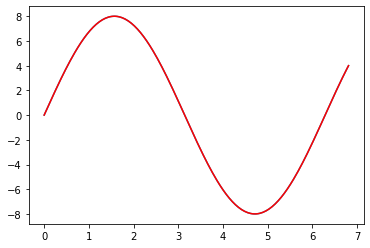

In [37]:
plt.plot(t, yt, t, y, 'r')

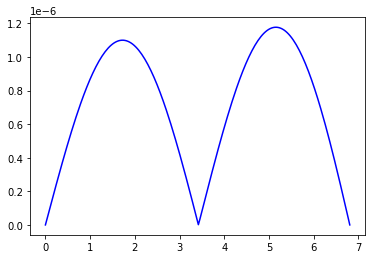

In [39]:
plt.plot(t, abs(yt-y), 'b')